## Possible DarkQuest acceptance

Simple contour plots showing reach of darkquest detection of A'-> dileptons.
Depends on rates files in `data` directory.

In [1]:
import math
import numpy
import os
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
import random as rand
from collections import OrderedDict
import mplhep as hep
plt.style.use(hep.style.CMS)

Parse input file.
Takes as input log file from running over available mass/coupling parameter space with the following format:

```line format: n_accepted total_events mass eps min_vz max_vz Brem/Eta```

In [35]:
class event:
    def __init__(self,values):
        self._mass = float(values[0])
        self._eps = float(values[1])
        self._ctau = float(values[2])
        self._minvz = float(values[3])
        self._maxvz = float(values[4])
        self._acpE = float(values[5])
    
    def getEps(self):
        return self._eps
    
    def getMass(self):
        return self._mass
    
    def getAccpt(self):
        return self._acpE
    
    def __repr__(self):
        return str([self._acpE,self._mass,self._eps,self._minvz,self._maxvz])


In [36]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [151]:
def parseFile(minVz,maxVz,lep="muons",mech="Brem"):
    
    fileName = f"/seaquest/users/yfeng/DarkQuest/DarkQuest/lhe/{mech}_{lep}_{minVz}_{maxVz}.txt"
    file = open(fileName)
    eventsList = []
    for l in file.readlines():
        spStr_org = l.split()
        #print(spStr_org)
        spstr = [sp for sp in spStr_org if isfloat(sp)]
        #print(spstr)
        newEvent = event(spstr)
        #if newEvent.getMech()==mech:
        eventsList.append(newEvent)
    return eventsList

In [152]:
parseFile(500,600)

[[0.0, 0.25, 0.001, 500.0, 600.0],
 [0.0, 0.25, 0.000562341, 500.0, 600.0],
 [0.0, 0.25, 0.000316228, 500.0, 600.0],
 [0.0, 0.25, 0.000177828, 500.0, 600.0],
 [0.0, 0.25, 0.0001, 500.0, 600.0],
 [0.0, 0.25, 5.6234e-05, 500.0, 600.0],
 [0.0, 0.25, 3.1623e-05, 500.0, 600.0],
 [0.0, 0.25, 1.7783e-05, 500.0, 600.0],
 [7.5e-05, 0.25, 1e-05, 500.0, 600.0],
 [0.006355, 0.25, 5.623e-06, 500.0, 600.0],
 [0.037055, 0.25, 3.162e-06, 500.0, 600.0],
 [0.063399, 0.25, 1.778e-06, 500.0, 600.0],
 [0.040355, 0.25, 1e-06, 500.0, 600.0],
 [0.016212, 0.25, 5.62e-07, 500.0, 600.0],
 [0.005539, 0.25, 3.16e-07, 500.0, 600.0],
 [0.001795, 0.25, 1.78e-07, 500.0, 600.0],
 [0.000572, 0.25, 1e-07, 500.0, 600.0],
 [0.000181, 0.25, 5.6e-08, 500.0, 600.0],
 [5.7e-05, 0.25, 3.2e-08, 500.0, 600.0],
 [1.8e-05, 0.25, 1.8e-08, 500.0, 600.0],
 [6e-06, 0.25, 1e-08, 500.0, 600.0],
 [0.0, 0.35, 0.001, 500.0, 600.0],
 [0.0, 0.35, 0.000562341, 500.0, 600.0],
 [0.0, 0.35, 0.000316228, 500.0, 600.0],
 [0.0, 0.35, 0.000177828, 50

The following are functions that read rates/BR files

In [153]:
def getRatefromAsher(epsilon,POT = 1.0e18, lep="muons", mech="Brem"):
    bfs = {}
    idir = "/seaquest/users/yfeng/DarkQuest/DarkQuest/lhe"
    if lep=='muons':
        iBFfile = f"{idir}/data/BFtoMuons.txt"
    else:
        iBFfile = f"{idir}/data/BFtoElectrons.txt"
    iBR = open(iBFfile)
    #Log[10,mAp/GeV]	Log[10,BF]
    for l in iBR:
        temp = l.split()
        if '#' in l or len(temp)==0: continue
        mass = pow(10,float(temp[0]))
        bfs['%.3f'%mass] = pow(10,float(temp[1]))

    rates = OrderedDict() 
    ifileYield = open(f"{idir}/data/{mech}Yield.txt")
    #epsilon = 10^-6, POT = 1.44*10^18, rescale yield as NAp = column2*(epsilon/10^-6)^2 (POT/1.44*10^18)
    #Log[10,mAp/GeV]	Log[10,NAp]
    for l in ifileYield:
        temp = l.split()
        if '#' in l or len(temp)==0: continue
        mass = pow(10,float(temp[0]))
        column2 = pow(10,float(temp[1]))
        NAp = column2*(POT/1.44e18)*(epsilon/10**(-6))**2
        if '%.3f'%mass in bfs:
            BF = bfs['%.3f'%mass]
        else:
            print('No BF!')
            BF = 1
        rates['%.3f'%mass] = NAp*BF
    return rates

# this function interpolates between existent rates
def addrates(masses,rates):
    im = 0
    lrates = list(rates.values())
    new_rates = {}
    for m in masses:
        mass = '%.3f'%m
        if mass in list(rates.keys()):
            im = im + 1
            new_rates[mass] = rates[mass]
        else:
            new_rates[mass] = lrates[im-1]
    return new_rates

In [154]:
getRatefromAsher(1e-6)

OrderedDict([('0.001', 7.974783174098624e-97),
             ('0.002', 7.9747961903295e-97),
             ('0.003', 7.974814592343274e-97),
             ('0.004', 7.974843053727731e-97),
             ('0.005', 7.974872836940949e-97),
             ('0.006', 7.974915808820603e-97),
             ('0.007', 7.974960133194798e-97),
             ('0.008', 7.97501852359542e-97),
             ('0.009', 7.97506743095041e-97),
             ('0.010', 7.975126235150051e-97),
             ('0.011', 7.975196960119122e-97),
             ('0.012', 7.975282053106621e-97),
             ('0.013', 7.975384477415898e-97),
             ('0.014', 7.975443283683764e-97),
             ('0.015', 7.975578679573755e-97),
             ('0.016', 7.975656471079001e-97),
             ('0.017', 7.97583573068235e-97),
             ('0.018', 7.975938819861389e-97),
             ('0.019', 7.976052108319249e-97),
             ('0.020', 7.976176640561235e-97),
             ('0.021', 7.976313575252912e-97),
             ('0.0

In [194]:
def yields(minVz,maxVz, lep="muons",mech="Brem"):
    events = parseFile(minVz,maxVz,lep,mech)
    
    # protons on target
    #POT = 10**18 
    POT = 1.0e18
    
    yields = {}
    masses = []
    epsilons = []
    couplings = {}
        
    for ev in events:
        if ev.getMass() not in masses:
            masses.append(ev.getMass())
        if ev.getEps() not in epsilons:
            epsilons.append(ev.getEps())
        if ev.getEps() in couplings:
            couplings[ev.getEps()].append(ev)
        else:
            couplings[ev.getEps()]=[ev]

    cross = []
    i=0
    rates_per_eps = {}
    accpts_per_eps = {}
    nevts_per_eps = {}
    for eps in epsilons:
        #old_rates = getRate(lep,mech)
        rates = getRatefromAsher(eps,POT,lep,mech)
        new_rates = addrates(masses,rates)
        rates_per_eps['%.2e'%eps] = rates
        accpts_per_eps['%.2e'%eps] = {}
        nevts_per_eps['%.2e'%eps] = {}
        cross.append([])
        for m in masses:
            for ev in events:
                if ev.getMass() == m and ev.getEps() == eps:
                    cross[i].append(ev.getAccpt()*new_rates['%.3f'%m]) #*POT*eps**2) # this is not needed anymore since its accounted for in the new_rates
                    accpts_per_eps['%.2e'%eps]['%.3f'%m] = ev.getAccpt()
                    nevts_per_eps['%.2e'%eps]['%.3f'%m] = ev.getAccpt() * new_rates['%.3f'%m]
        i+=1
    
    return accpts_per_eps, nevts_per_eps

In [200]:
 def plotAccpt(accpts_per_eps, lep = "muons", mech="Brem", title= "Acceptance", zmin = 1e-4, zmax = 10.0):   
    #print(ratios_per_eps)
    
    mass_to_plot = []
    eps_to_plot = []
    acc_to_plot = []
    for eps, vals in accpts_per_eps.items():
        for m, acc in vals.items():
            #print(f"mass {m} eps {eps} acc {acc}")
            if acc > zmin:
                mass_to_plot.append(float(m))
                eps_to_plot.append(float(eps))
                acc_to_plot.append(float(acc))
        
    # now plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #print(mass_to_plot)
    #print(eps_to_plot)
    sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd)
    print("scatter: ", sc)
    ax.set_xlabel("mass (GeV)")
    ax.set_ylabel(r"$\epsilon$")
    ax.set_title(f'{title} ({lep} {mech})')
    ax.set_yscale('log')
    if lep=='muons':
        if 'Brem' in mech:
            ax.set_xlim(.20,3.0)
        else:
            ax.set_xlim(0.2,0.6)
    if lep=='electrons':
        ax.set_ylim(1e-8,1e-2)
        if 'Brem' in mech:
            #ax.set_xlim(.01,3.05)
            ax.set_xlim(.05,2.0)
            ax.set_xscale('log')
        else:
            ax.set_xlim(.05,1.1) 
            ax.set_xscale('log')
    ax.set_ylim(1e-9,1e-2)
    fig.colorbar(sc, ax=ax)
    sc.set_clim(zmin,zmax)
    #plt.show()
    plt.savefig(f"acceptance_{lep}_{mech}.png")
    plt.show()
    #plt.clf()

In [201]:
accpts_per_eps,_ = yields(500,600,"muons", "Brem")
print(_)

{'1.00e-03': {'0.250': 0.0, '0.350': 0.0, '0.450': 0.0, '0.550': 0.0, '0.650': 0.0, '0.750': 0.0, '0.850': 0.0, '0.950': 0.0, '1.050': 0.0, '1.150': 0.0, '1.250': 0.0, '1.350': 0.0, '1.450': 0.0, '1.550': 0.0, '1.650': 0.0, '1.750': 0.0, '1.850': 0.0, '1.950': 0.0, '2.050': 0.0, '2.150': 0.0, '2.250': 0.0, '2.350': 0.0, '2.450': 0.0, '2.550': 0.0, '2.650': 0.0, '2.750': 0.0, '2.850': 0.0, '2.950': 0.0, '3.050': 0.0}, '5.62e-04': {'0.250': 0.0, '0.350': 0.0, '0.450': 0.0, '0.550': 0.0, '0.650': 0.0, '0.750': 0.0, '0.850': 0.0, '0.950': 0.0, '1.050': 0.0, '1.150': 0.0, '1.250': 0.0, '1.350': 0.0, '1.450': 0.0, '1.550': 0.0, '1.650': 0.0, '1.750': 0.0, '1.850': 0.0, '1.950': 0.0, '2.050': 0.0, '2.150': 0.0, '2.250': 0.0, '2.350': 0.0, '2.450': 0.0, '2.550': 0.0, '2.650': 0.0, '2.750': 0.0, '2.850': 0.0, '2.950': 0.0, '3.050': 0.0}, '3.16e-04': {'0.250': 0.0, '0.350': 0.0, '0.450': 0.0, '0.550': 0.0, '0.650': 0.0, '0.750': 0.0, '0.850': 0.0, '0.950': 0.0, '1.050': 0.0, '1.150': 0.0, '1.250

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d88f5400>


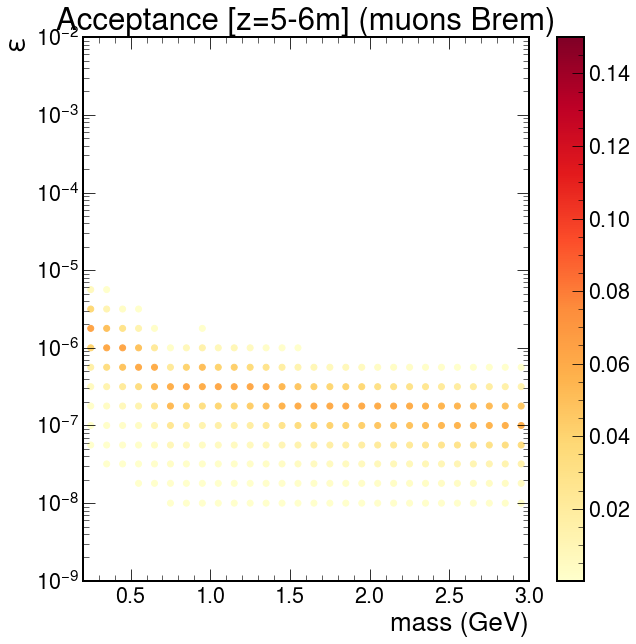

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d9d08040>


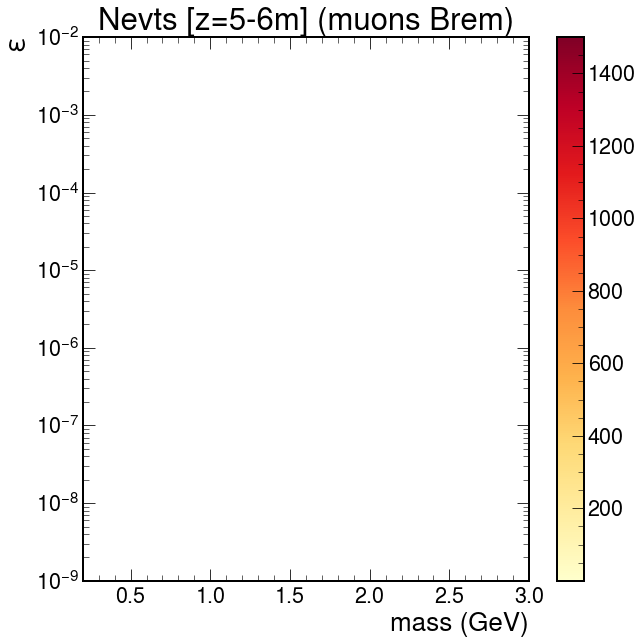

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d885bfd0>


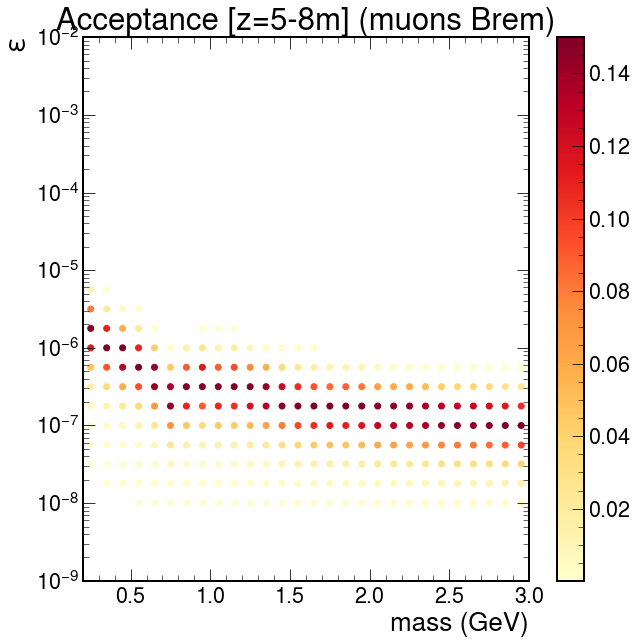

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d9117190>


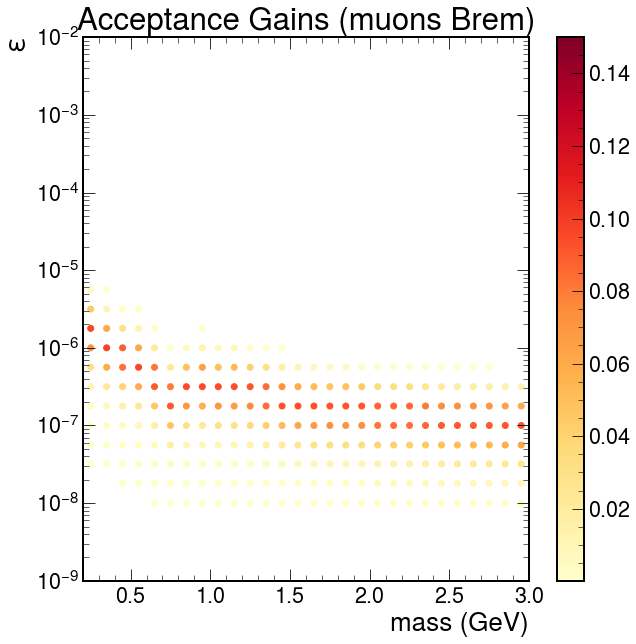

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d94a2190>


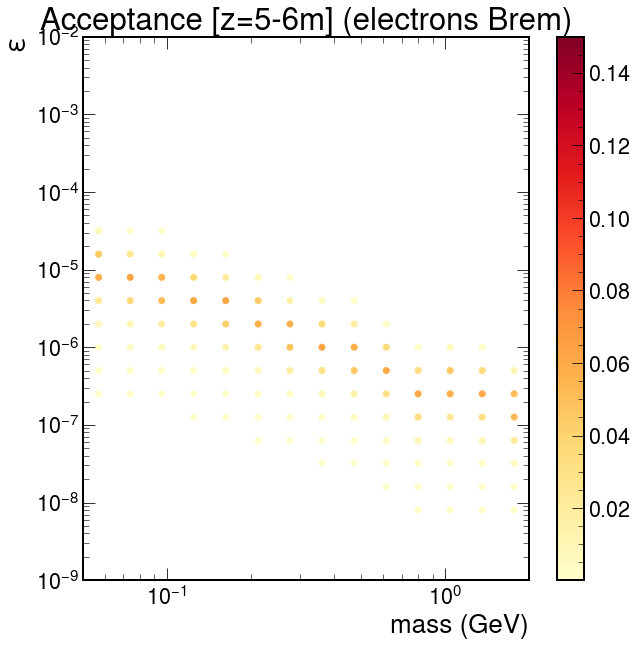

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d8466280>


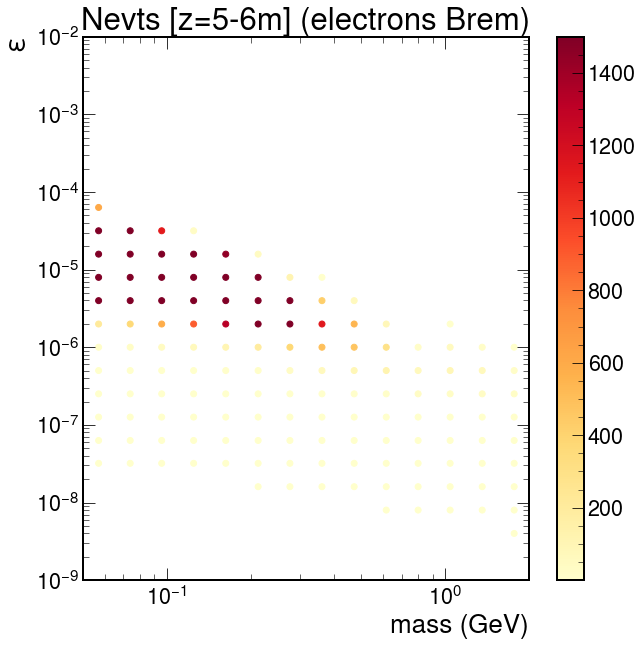

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d885b760>


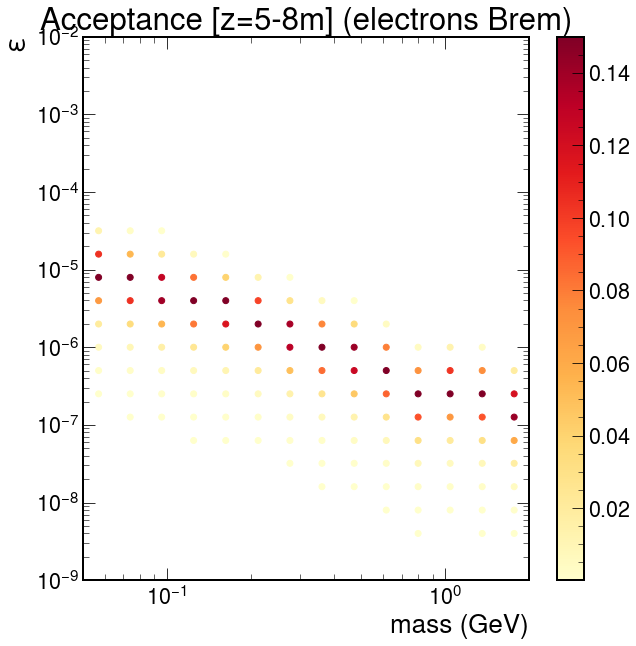

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d88b6400>


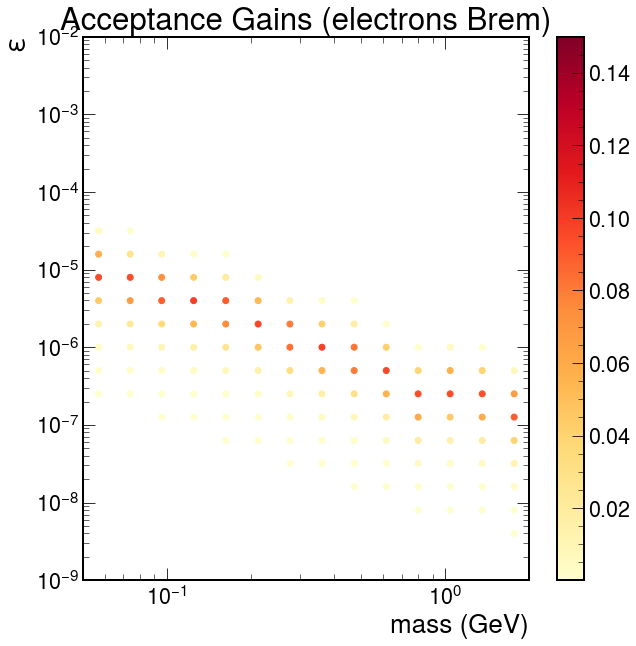

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d8cdd820>


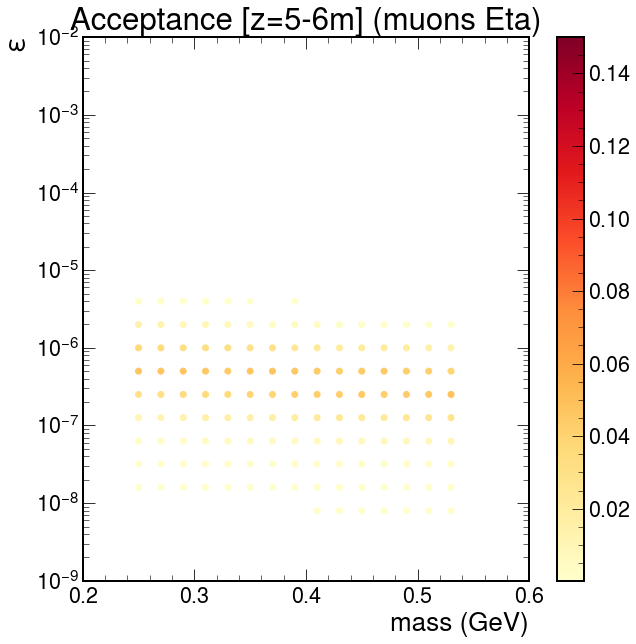

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d91bb670>


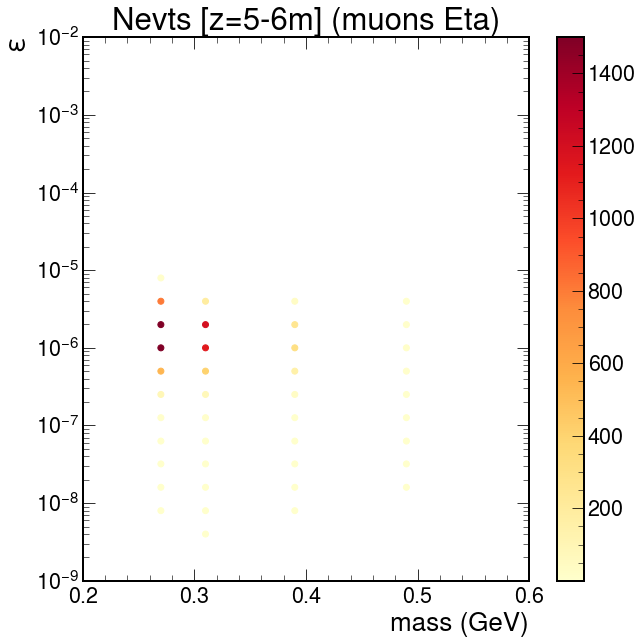

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d8472b50>


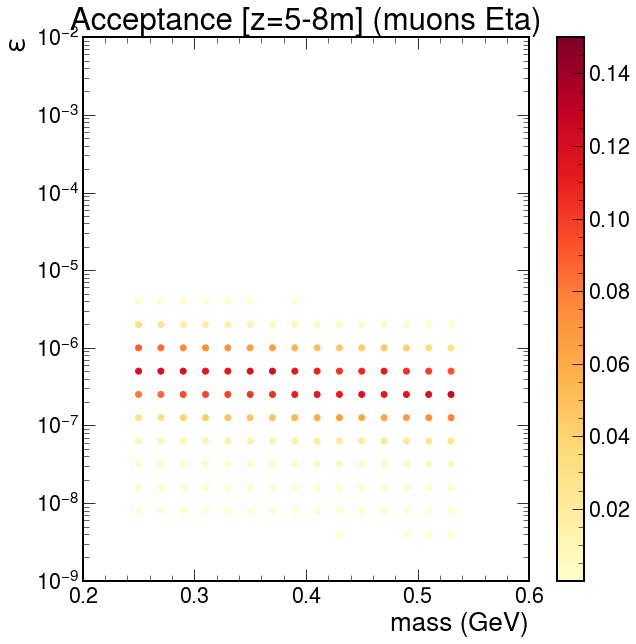

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d8466a60>


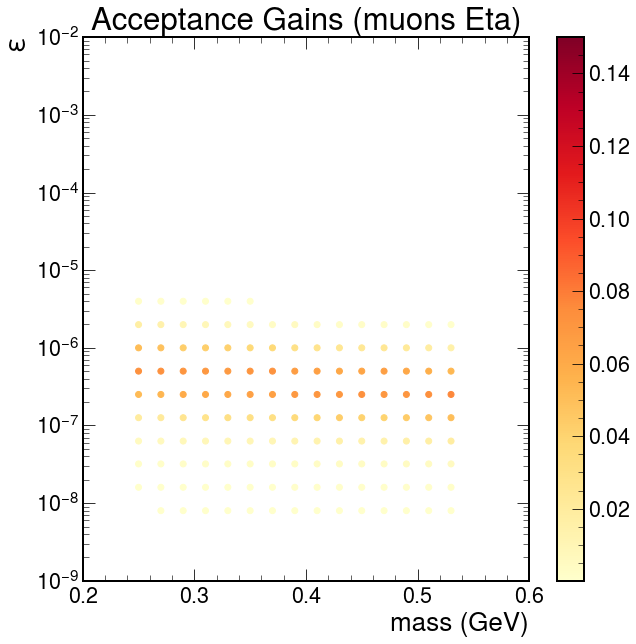

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d937ec10>


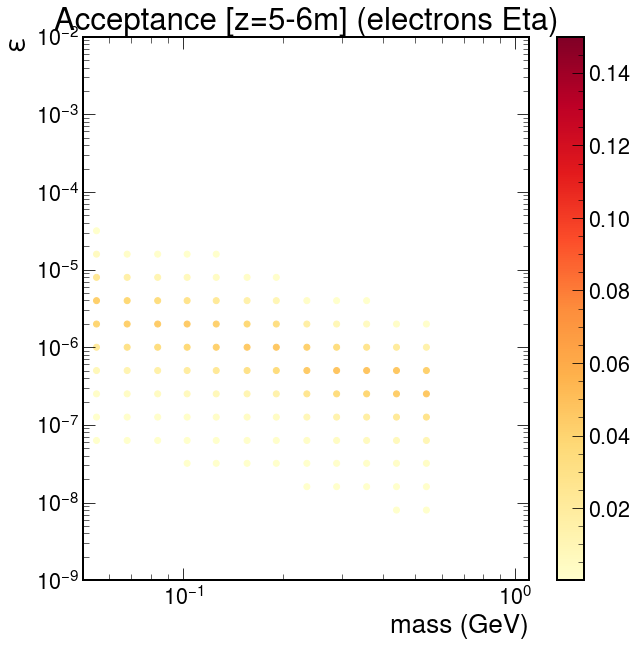

scatter:  <matplotlib.collections.PathCollection object at 0x7f57db607f10>


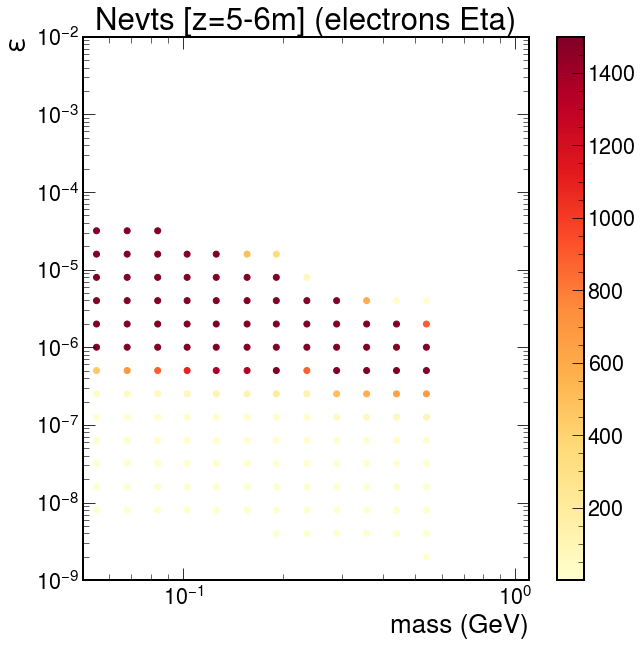

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d878cf40>


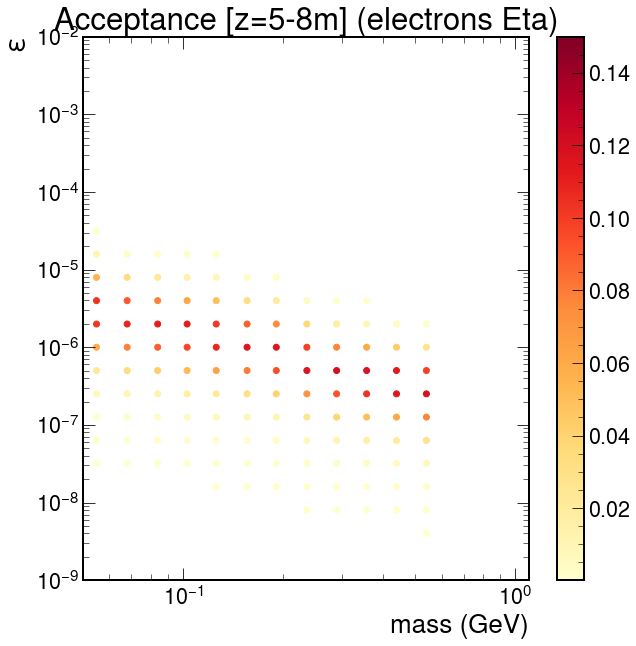

scatter:  <matplotlib.collections.PathCollection object at 0x7f57d8a09ac0>


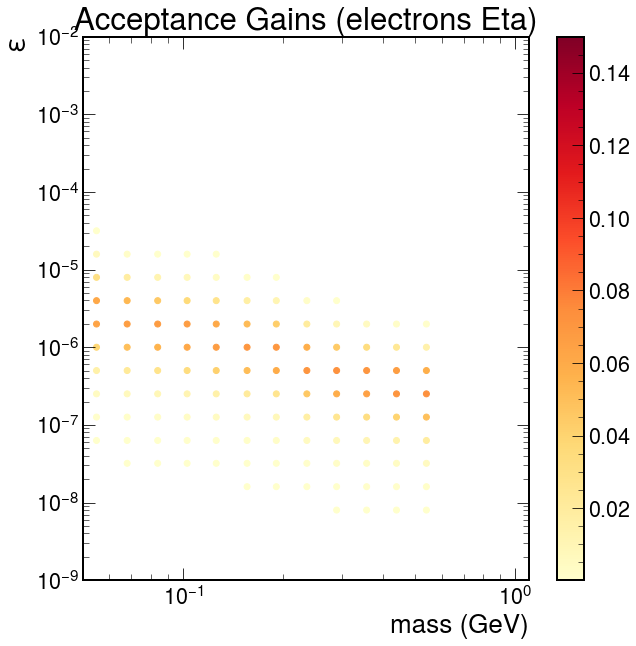

In [204]:
for mech in ["Brem", "Eta"]:
    for lep in ["muons", "electrons"]:
        accpts_per_eps,_ = yields(500,600,lep,mech)
        plotAccpt(accpts_per_eps, zmax = 0.15, lep = lep, mech = mech, title = "Acceptance [z=5-6m]")
        plotAccpt(_, zmax = 1500, zmin = 0.00001,title = "Nevts [z=5-6m]", lep = lep, mech = mech)
        accpts_per_eps_new, _ = yields(500,800, lep,mech)
        plotAccpt(accpts_per_eps_new, zmax = 0.15, title = "Acceptance [z=5-8m]", lep = lep, mech = mech)

        accpts_per_eps_gains = {}
        for eps, vals in accpts_per_eps.items():
            accpts_per_eps_gains[eps] = {}
            for m, acc in vals.items():
                accpts_per_eps_gains[eps][m] = accpts_per_eps_new[eps][m] - accpts_per_eps[eps][m]
        plotAccpt(accpts_per_eps_gains, zmax = 0.15, title="Acceptance Gains", lep = lep, mech = mech)
